<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_06_interpolacion.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 6
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

__Activity__:  Movement with uniform acceleration
1. Define a polynomial for the movement with uniform acceleration:
\begin{align}
x(t)=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2 \,,
\end{align}
2. Use the previous formula expressed as polynomial of degree 2, to solve the following problem with `np.poly1d`: 
    * A car departs from rest with a constant acceleration of $6\text{m}\cdot\text{s}^{-2}$ and travels through a flat and straight road. 10 seconds later a second pass for the same starting point and in the same direction with an initial speed of $10\text{m}\cdot\text{s}^{-1}$ and a constant acelleration of $10\text{m}\cdot\text{s}^{-2}$. Find the time and distance at which the two cars meet. *
    
_Hint_. 
\begin{align}
x(t)=x_0-v_0t_0+\frac{1}{2}at_0^2 +(v_0-at_0)t+\tfrac{1}{2} a t^2 
\end{align}



__Activity__: For  the function $f(x) = \tan (x)$ between $-\frac{\pi}{4}$ and $\frac{\pi}{4}$ using $N=10$ points (9 intervals). Plot both, the interpolation and the original function.

Explore the behaviour of the Linear Interpolation algorithm when varying the number of data used.


__Activity__: Apply lagrange interpolations with the following points, work with pandas data frame


x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

__Activity__: Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.


![img](https://github.com/hernansalinas/autogrades/blob/main/Actividades_clase/imagenes/planetario.png?raw=true)
1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

### **Trabajo de clase**

In [1]:
# Importar librerías

import numpy as np
import matplotlib.pylab as plt
import scipy as sp
from scipy import interpolate 
import pandas as pd

In [31]:
x=np.array([1, 2, 3, 6, 8])
y=np.array([1, 1.5, 2, 3, 4])

In [32]:
f = interpolate.interp1d( x, y, kind = 'linear' )

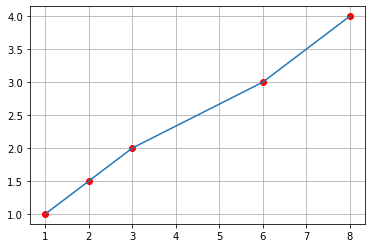

In [33]:
plt.figure()
plt.plot(x,y,"ro")
np.linspace(1,16)
plt.plot(x, f(x))
plt.grid()

**Activity:** Movement with uniform acceleration

In [51]:
# Coeficientes del primer carro
a1 = 6
v10 = 0
x10 = 0
t1 = 0

# Coeficientes del segundo carro
a2 = 10
v20 = 10
x20 = 0
t2 = 10

# Ecuación de movimiento (la posición en función del tiempo)
t_encuentro = 10
x1 = np.poly1d([0.5*a1, v10-a1*t1,x10-v10*t1+0.5*a1*t1**2])
x2 = np.poly1d([0.5*a2, v20-a2*t2,x20-v20*t2+0.5*a2*t2**2])
print("Polinomio 1:", x1)
print("Polinomio 2:", x2)

# Polinomio en el que los carros se encuentran
enc = x1 -x2
print("Polinomio de encuentro:", enc)

# Tiempo en el que se encuentran los carros
raices = enc.roots
t = raices[0] # aqui solo se incluye el tiempo 40 s, físicamente solo puede ser ese
print("Tiempos posibles en que se encuentran los carros:", raices)
print("El tiempo en que se encuentran los carros es", t, "segundos") 

# Distancia en la cual los carros se encuentran
distancia = x1(raices[0])
print("La distancia en que se encuentran los carros es de", distancia, "metros")

Polinomio 1:    2
3 x
Polinomio 2:    2
5 x - 90 x + 400
Polinomio de encuentro:     2
-2 x + 90 x - 400
Tiempos posibles en que se encuentran los carros: [40.  5.]
El tiempo en que se encuentran los carros es 40.0 segundos
La distancia en que se encuentran los carros es de 4800.0 metros


**Activity:** For the function  f(x)=tan(x)  between  −π4  and  π4  using  N=10  points (9 intervals). Plot both, the interpolation and the original function.

Explore the behaviour of the Linear Interpolation algorithm when varying the number of data used.

In [5]:
# Función tangente interpolada con tipo cubica

n_points = 10
x2 = np.linspace(-np.pi/4, np.pi/4, n_points)
y2 = np.tan(x2)
g = interpolate.interp1d(x2, y2, kind = "cubic")

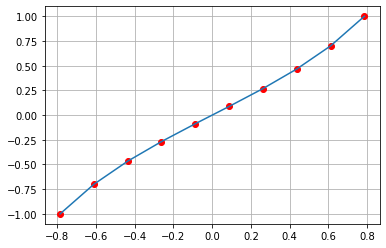

In [28]:
# Gráfica de la tangente con la gráfica de su interpolación

plt.figure()
plt.plot(x2,y2,"ro")
np.linspace(1,16)
plt.plot(x2, g(x2)) # Interpolación
plt.grid()

**Activity:** Apply lagrange interpolations with the following points, work with pandas data frame


In [23]:
# Puntos propuestos

x1 = np.array([1, 1.3, 1.6, 1.9, 2.2])
y1 = np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

In [36]:
# DataFrames de los array

df = pd.DataFrame({'x': x1, 'y': y1})
df

,x,y
0,1.0,0.765198
1,1.3,0.620086
2,1.6,0.455402
3,1.9,0.281819
4,2.2,0.110362


In [39]:
from scipy.interpolate import lagrange

f = lagrange(df['x'], df['y'])
print(f)

          4           3         2
0.001825 x + 0.05529 x - 0.343 x + 0.07339 x + 0.9777


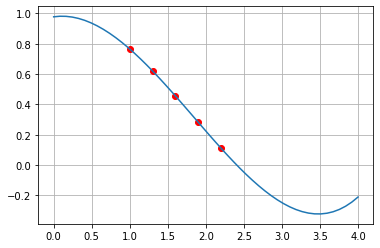

In [40]:
plt.figure()
plt.plot(x1, y1,"ro") # Se grafica la función
np.linspace(1,16)
x = np.linspace(0, 4)
plt.plot(x, f(x)) # Se grafica la interpolación y x
plt.grid()

**Activity:** Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste

In [16]:
pixeles_x = [370, 378, 402, 430, 466, 536, 602, 664, 710, 744, 758, 764]
pixeles_y = [226, 176, 130, 98, 64, 46, 48, 76, 114, 168, 200, 246]

planetario = lagrange(pixeles_x, pixeles_y)
print(planetario) # Polinomio de Lagrange

           11             10             9             8             7
1.888e-22 x  - 1.122e-18 x  + 3.004e-15 x - 4.777e-12 x + 5.014e-09 x
              6           5          4         3            2
 - 3.644e-06 x + 0.00187 x - 0.6775 x + 169.6 x - 2.79e+04 x + 2.712e+06 x - 1.178e+08


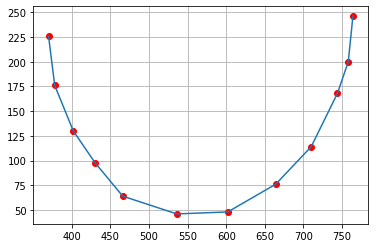

In [17]:
# Gráfica de la interpolación de Lagrange

plt.figure()
plt.plot(pixeles_x,pixeles_y,"ro")
np.linspace(1,16)
plt.plot(pixeles_x, planetario(pixeles_x))
plt.grid()

In [18]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pylab as plt

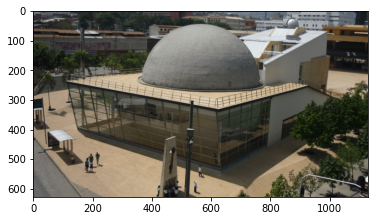

In [19]:
url = 'https://www.turismodeestrellas.com/media/files/1973_planetario-medellin.jpg'
response = requests.get(url)
imagen = Image.open(BytesIO(response.content))
p = np.array(imagen)
plt.imshow(p)

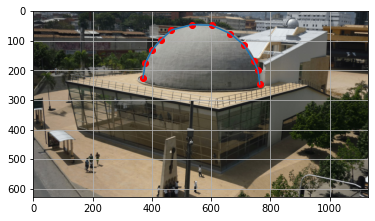

In [20]:
# Interpolación de Lagrange sobrepuesta en la imagen

plt.figure()
plt.plot(pixeles_x,pixeles_y,"ro")
np.linspace(1,16)
plt.plot(pixeles_x, planetario(pixeles_x))
plt.grid()
plt.imshow(p)

**Actividad:** Interpolation Spline

In [ ]:
from scipy.interpolate import CubicSpline

plan = CubicSpline(pixeles_x, pixeles_y)
print(plan)

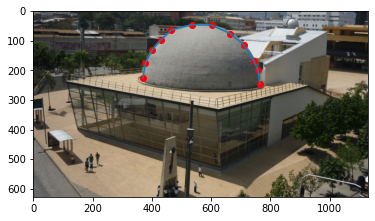

In [ ]:
# Interpolación por Cubic Spline sobrepuesta en la imagen

plt.figure()
plt.plot(pixeles_x,pixeles_y,"ro")
np.linspace(1,16)
plt.plot(pixeles_x, plan(pixeles_x))
plt.imshow(p)